In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
fileName = "G:\My Drive\Data\CC GENERAL.csv"
df = pd.read_csv(fileName)

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [5]:
print(df.isnull().sum())
df = df.dropna()
df.shape

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


(8636, 18)

In [27]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

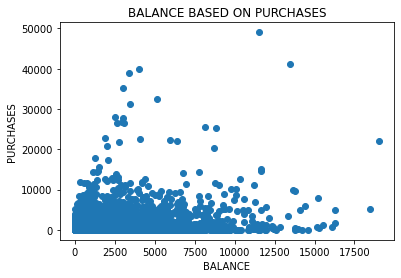

In [7]:
plt.scatter(df['BALANCE'],df['PURCHASES'])
plt.title("BALANCE BASED ON PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

In [8]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['BALANCE','PURCHASES']])
    sse.append(km.inertia_)

[78472946519.34874, 50760864656.88084, 33267853823.327965, 24196551827.13149, 19019110724.187996, 15156400059.533516, 12725172322.353115, 11335473002.961926, 10067487702.41129]


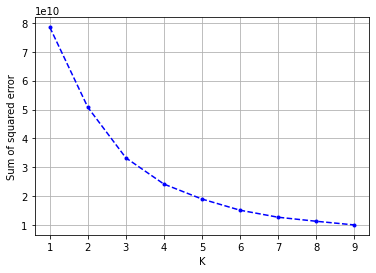

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
print(sse)
plt.grid()
plt.plot(k_rng, sse, linestyle='--', marker='.', color='b')

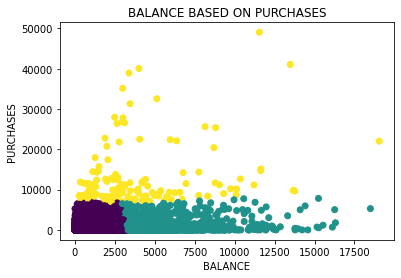

In [10]:
km = KMeans(n_clusters=3)
yp = km.fit(df[['BALANCE','PURCHASES']])
cluster = km.labels_
plt.scatter(df['BALANCE'],df['PURCHASES'],c=cluster)
plt.title("BALANCE BASED ON PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

In [39]:
df.ONEOFF_PURCHASES.describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

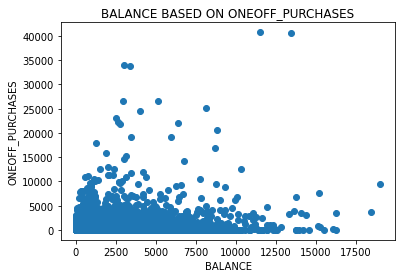

In [38]:
plt.scatter(df['BALANCE'],df['ONEOFF_PURCHASES'])
plt.title("BALANCE BASED ON ONEOFF_PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("ONEOFF_PURCHASES")
plt.show()

[62416472824.08489, 36014960377.244736, 24772466019.272476, 19206807150.798344, 13864693915.144424, 11257320353.228094, 9125960176.454052, 7861537351.437788, 7065546890.811499, 6217985107.807058, 5519535500.217456, 4910664325.762708, 4543943827.376612, 4160538376.70153, 3832417405.466991, 3558839201.9451694, 3312313992.699538, 3148891705.2274075, 2946765919.662282]


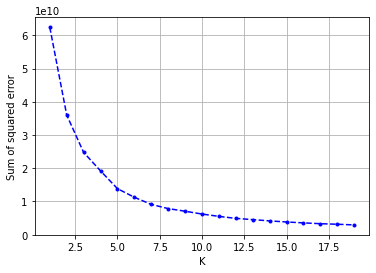

In [42]:
k_rng = range(1,20)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['BALANCE','ONEOFF_PURCHASES']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
print(sse)
plt.grid()
plt.plot(k_rng, sse, linestyle='--', marker='.', color='b')

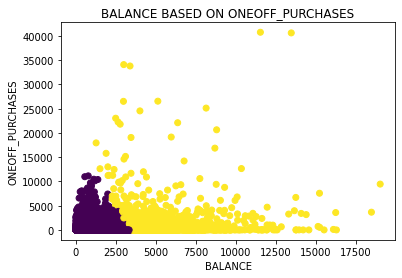

In [43]:
km = KMeans(n_clusters=2)
yp = km.fit(df[['BALANCE','ONEOFF_PURCHASES']])
cluster = km.labels_
plt.scatter(df['BALANCE'],df['ONEOFF_PURCHASES'],c=cluster)
plt.title("BALANCE BASED ON ONEOFF_PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("ONEOFF_PURCHASES")
plt.show()